## Day37 - Scrape Elon Musk + Dogecoin

In [181]:
from selenium import webdriver
import pandas as pd
import re

In [141]:
# -- https://www.youtube.com/watch?v=3KaffTIZ5II&t=782s

url = r'https://twitter.com/elonmusk'

# you need to have installed geckdriver and have it installed on the 
# Python's folder
driver = webdriver.Firefox()
driver.get(url)

tweets = driver.find_elements_by_xpath('//div[@data-testid="tweet"]')

comments = []
respondings = []
dates = []

tags = ['doge','dogecoin','dog','shiba']
ids = set()

last_position = driver.execute_script("return window.pageYOffset;")
scrolling = True

while scrolling:
    
    sleep(2)
    tweets = driver.find_elements_by_xpath('//div[@data-testid="tweet"]')
    
    for tweet in tweets:
        
        comment = tweet.find_element_by_xpath('.//div[2]/div[2]/div[1]').text
        resp = tweet.find_element_by_xpath('.//div[2]/div[2]/div[2]').text
        
        tw_id = hash(comment)
        
        if tw_id not in ids:
            
            for tag in tags:

                if (tag in comment.lower() or tag in resp.lower()):
                    comments.append(comment)
                    respondings.append(responding)
                    dates.append(tweet.find_element_by_xpath('.//time').get_attribute('datetime'))
                    ids.add(tw_id)
                    # when it founds the first match, ends the loop
                    break
    
    scroll_attempt = 0
    
    while True:
        # check scroll position
        
        driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
        sleep(2)
        curr_position = driver.execute_script("return window.pageYOffset;")
        
        if last_position == curr_position:
            scroll_attempt += 1
            
            # end of scroll region
            if scroll_attempt >= 3:
                scrolling = False
                break
            else:
                sleep(2) # attempt another scroll
        else:
            last_position = curr_position
            break

# close the web driver
driver.close()

In [142]:
df = pd.DataFrame({'date' : dates, 'comment' : comments, 'responding' : respondings})
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

In [143]:
df.to_csv('doge.csv')

In [156]:
print("# tweets = ", len(df))
df

# tweets =  15


,date,comment,responding
0,2021-04-01,SpaceX is going to put a literal Dogecoin on t...,
1,2021-03-14,I’m getting a Shiba Inu #resistanceisfutile,
2,2021-03-13,"Why are you so dogematic, they ask",
3,2021-03-13,Origin of Doge Day Afternoon:\nThe ancient Rom...,
4,2021-03-13,Doge day afternoon,
5,2021-03-06,Doge spelled backwards is Egod,
6,2021-03-01,Doge meme shield (legendary item),
7,2021-02-14,If major Dogecoin holders sell most of their c...,
8,2021-02-11,"Frodo was the underdoge,\nAll thought he would...",
9,2021-02-08,Ð is for Ðogecoin! Instructional video.,


In [157]:
import yfinance as yf
from datetime import datetime, timedelta

doge = yf.Ticker("DOGE-USD")

doge_stock = doge.history(
    start = pd.to_datetime(pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d').min()) - timedelta(days=2),
    end = datetime.now(), 
    interval='60m'
).reset_index()

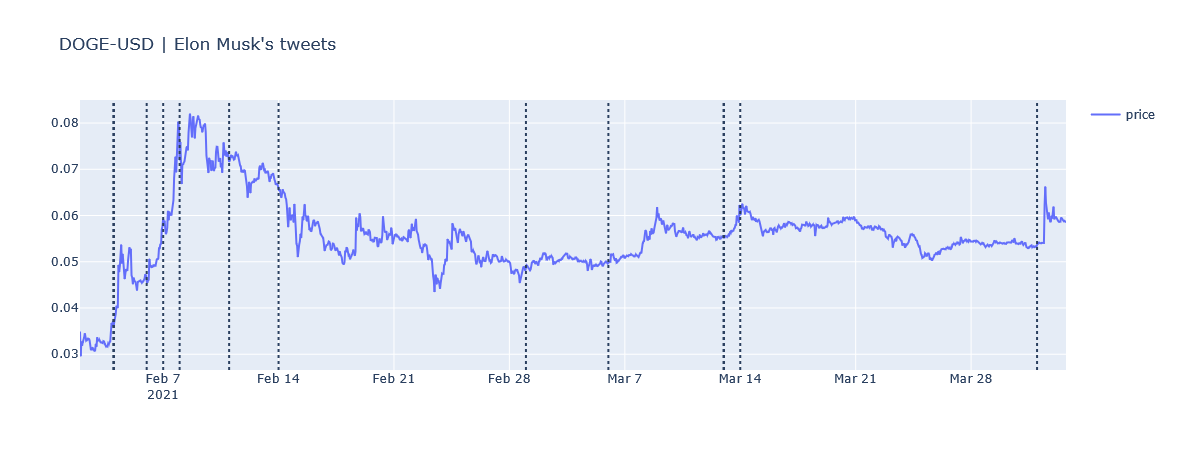

Feb 11 =  Frodo was the underdoge, All thought he would fail, Himself most of all.
Feb 14 =  If major Dogecoin holders sell most of their coins, it will get my full support. Too much concentration is the only real issue imo.
Mar 14 =  I’m getting a Shiba Inu #resistanceisfutile


In [184]:
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure(
        layout=go.Layout(
            title=go.layout.Title(text="DOGE-USD | Elon Musk's tweets")
    ))

# stock prices
fig.add_trace(go.Scatter(x=doge_stock['Datetime'], y=doge_stock['Close'], name='price'))

# add vertical lines
for date in df['date'].values:
    fig.add_vline(x=date, line = dict(dash = 'dot'), name='Elon\'s tweet')

fig.update_layout(showlegend=True)

# static image for github
fig.show("svg")

print("Feb 11 = ", re.sub(f"\n", " ", df.iloc[8]['comment']))
print("Feb 14 = ", df.iloc[7]['comment'], end="\n")
print("Mar 14 = ", df.iloc[1]['comment'])